# notebook imports and packages

In [107]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
import math as mat

%matplotlib inline

$f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

# Slopes and Derivatives

# $ (d/dx) * x^n = n * x ^n^-^1 $

In [3]:
def df(x):
    return 2 * x + 1

In [4]:
x_1 = np.linspace(-3, 3, 100)

(0.0, 12.0)

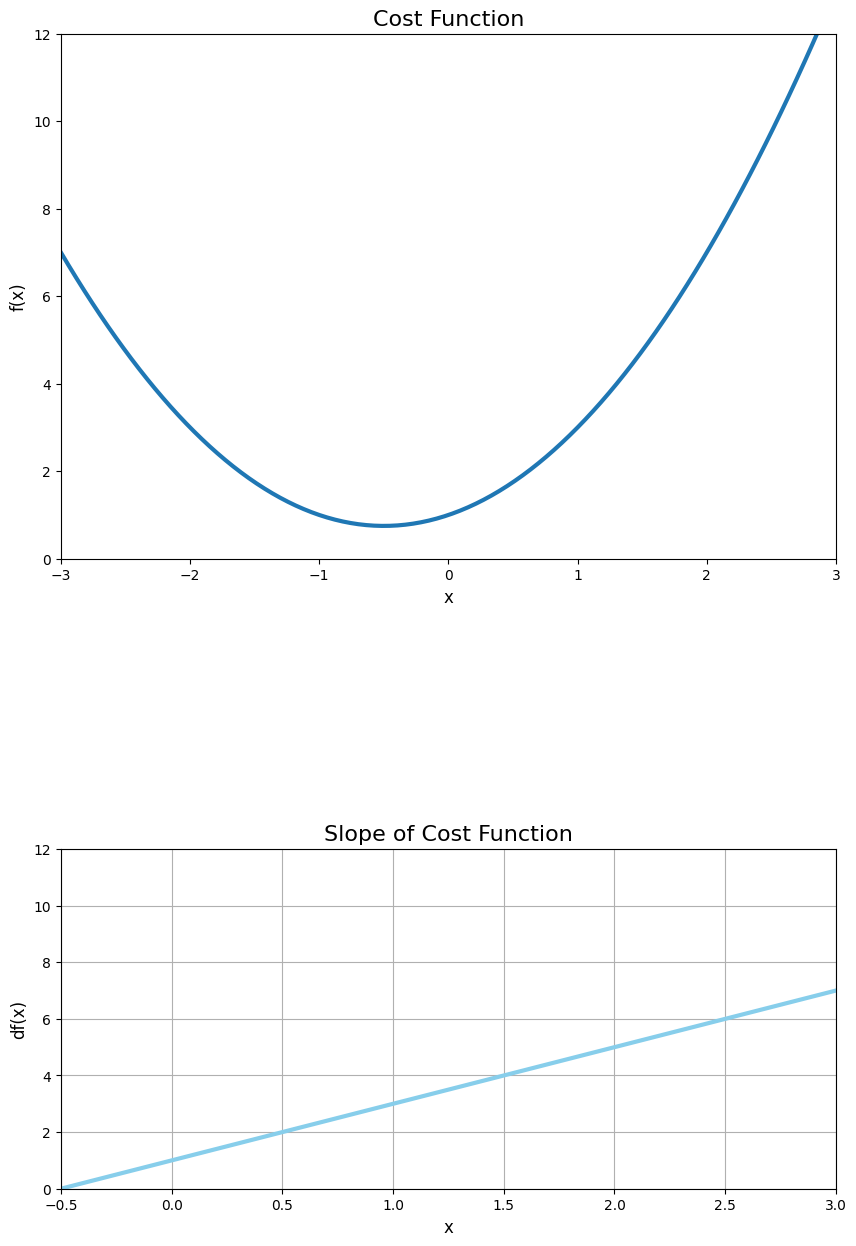

In [5]:
plt.figure(figsize=(10, 15))


plt.subplot(2, 1, 1)
plt.plot(x_1, f(x_1), linewidth=3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Cost Function', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(0, 12)
plt.subplot(3, 1, 3)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)
plt.title('Slope of Cost Function', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('df(x)', fontsize=12)
plt.xlim(-0.5, 3)
plt.grid()
plt.ylim(0, 12)

## Gradient Decent

In [15]:
new_x = 3
preveus_x = 0
mult = 0.1
presision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for char in range(50):
    preveus_x = new_x
    gradent = df(preveus_x)
    new_x = preveus_x - mult * gradent
    step_size = abs(new_x- preveus_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < presision:
        break
print(f'Local Minimum occurs at : {new_x}')
print(f"Slope or df(x) value at this point is : {df(new_x)}")
print(f"f(x) or cost at this point is : {f(new_x)}")

Local Minimum occurs at : -0.49962781616118024
Slope or df(x) value at this point is : 0.0007443676776395236
f(x) or cost at this point is : 0.7500001385208099


### Superimpose the gradient decent calculations on the plot

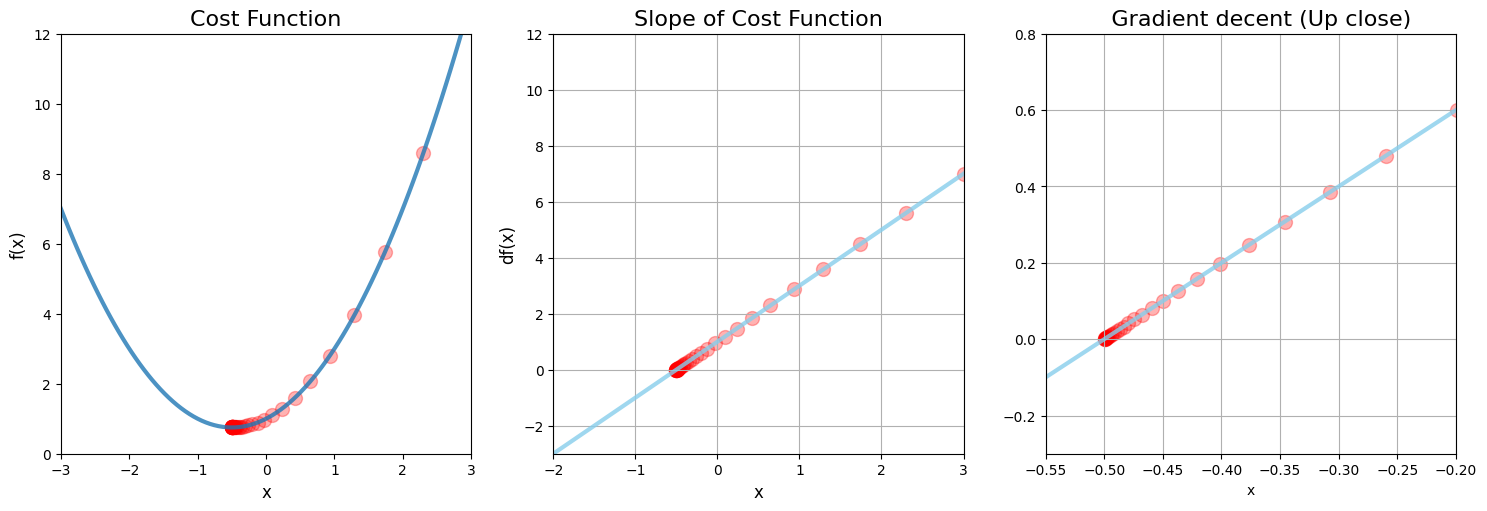

In [16]:
plt.figure(figsize=(18, 12))


plt.subplot(2, 3, 1)
plt.plot(x_1, f(x_1), linewidth=3, alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Cost Function', fontsize=16)
plt.xlim(-3, 3)
plt.ylim(0, 12)


plt.subplot(2, 3, 2)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.3)
plt.title('Slope of Cost Function', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('df(x)', fontsize=12)
plt.xlim(-2, 3)
plt.grid()
plt.ylim(-3, 12)

plt.subplot(2, 3, 3)
plt.title('   Gradient decent (Up close)', fontsize=16)
plt.xlabel('x')
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=3, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.3)

plt.show()

# Multiple minima vs Initial Guess & Advanced Functions
## $$g(x) = x^4 - 4x^2 + 5$$

In [8]:
x_2 = np.linspace(-2, 2, 1000)

In [9]:
def g(x):
    return x**4 - 4*(x**2) + 5

In [10]:
def dg(x):
    return 4*(x**3) - 8*x

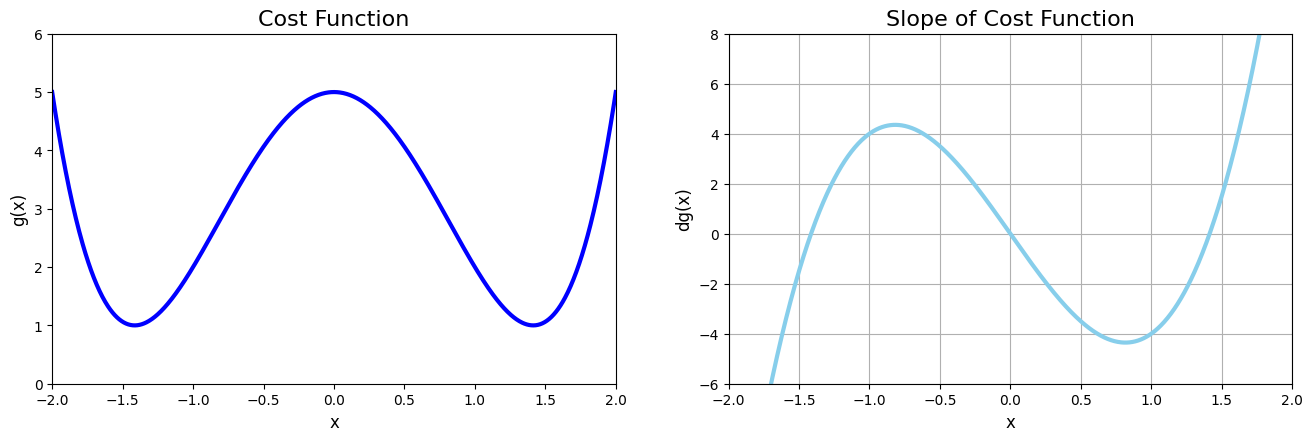

In [11]:
plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
plt.plot(x_2, g(x_2), linewidth=3, color='blue')
plt.xlabel('x', fontsize=12)
plt.ylabel('g(x)', fontsize=12)
plt.title('Cost Function', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.subplot(2, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.title('Slope of Cost Function', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('dg(x)', fontsize=12)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()


# Gradient decent as a Python function

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print(f'Local Minimum occurs at : {local_min}')
print(f'number of steps : {len(list_x)}')

Local Minimum occurs at : 1.4122375085019094
number of steps : 23


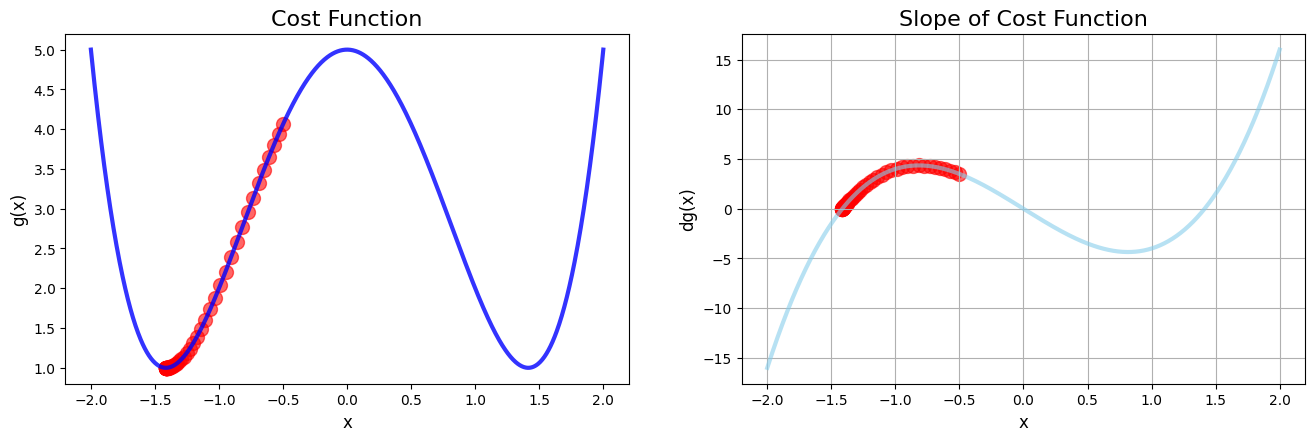

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, -0.5, 0.01, 0.0001)
plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
plt.plot(x_2, g(x_2), linewidth=3, color='blue', alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

plt.xlabel('x', fontsize=12)
plt.ylabel('g(x)', fontsize=12)
plt.title('Cost Function', fontsize=16)

plt.subplot(2, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.title('Slope of Cost Function', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('dg(x)', fontsize=12)

plt.grid()



# Divergence and Overflow

## $$ h(x) = x^5 - 2x^4 +2 $$

In [38]:
x_3 = np.linspace(-2.5, 2.5, 1000)

In [19]:
def h(x):
    return x**5 - 2*x**4 + 2

In [48]:
def dh(x):
    return 5*(x**4) - 8*(x**3)

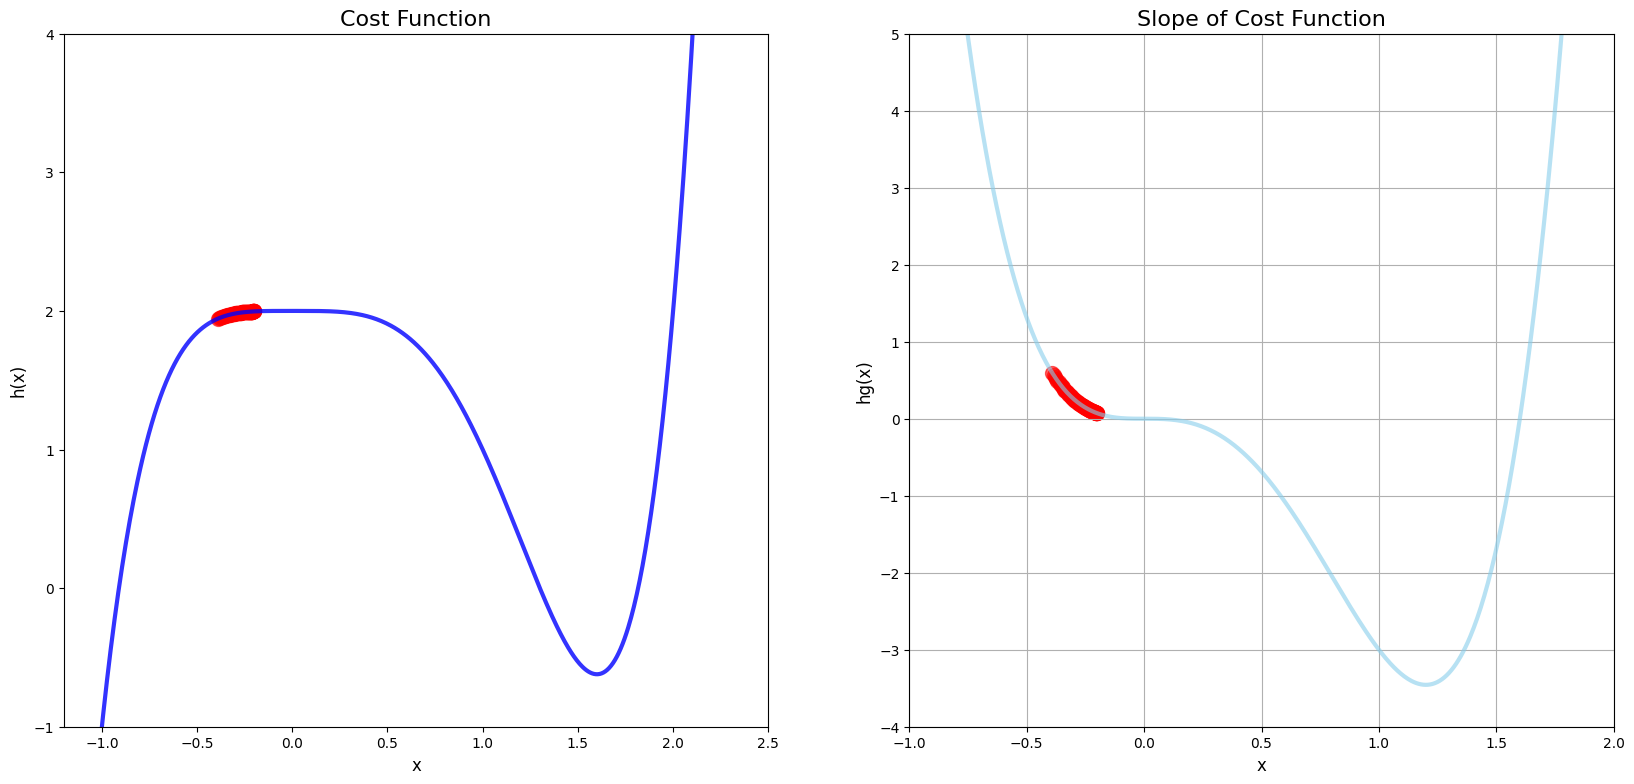

Local min occurs at: -0.3903255534741724
Cost at this minimum is: 1.9445163541365855
Number of steps: 101


In [43]:
local_min, list_x, deriv_list = gradient_descent(dh, -0.2, 0.01, 0.0001, 100)
plt.figure(figsize=(20, 9))


plt.subplot(1, 2, 1)
plt.plot(x_3, h(x_3), linewidth=3, color='blue', alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)


plt.xlabel('x', fontsize=12)
plt.ylabel('h(x)', fontsize=12)
plt.title('Cost Function', fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)
plt.title('Slope of Cost Function', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('hg(x)', fontsize=12)
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.grid()
plt.show()
print(f'Local min occurs at: {local_min}')
print(f'Cost at this minimum is: {h(local_min)}')
print(f'Number of steps: {len(list_x)}')

In [45]:
wierd_tuple = 42,

In [49]:
data_tuple = gradient_descent(dh, 0.2)
print(f'Local min occurs at: {data_tuple[0]}')
print(f'Cost at this minimum is: {h(data_tuple[0])}')
print(f'Number of steps: {len(data_tuple[1])}')

Local min occurs at: 1.5989534547394717
Cost at this minimum is: -0.6214287992331258
Number of steps: 117


# The Learning Rate

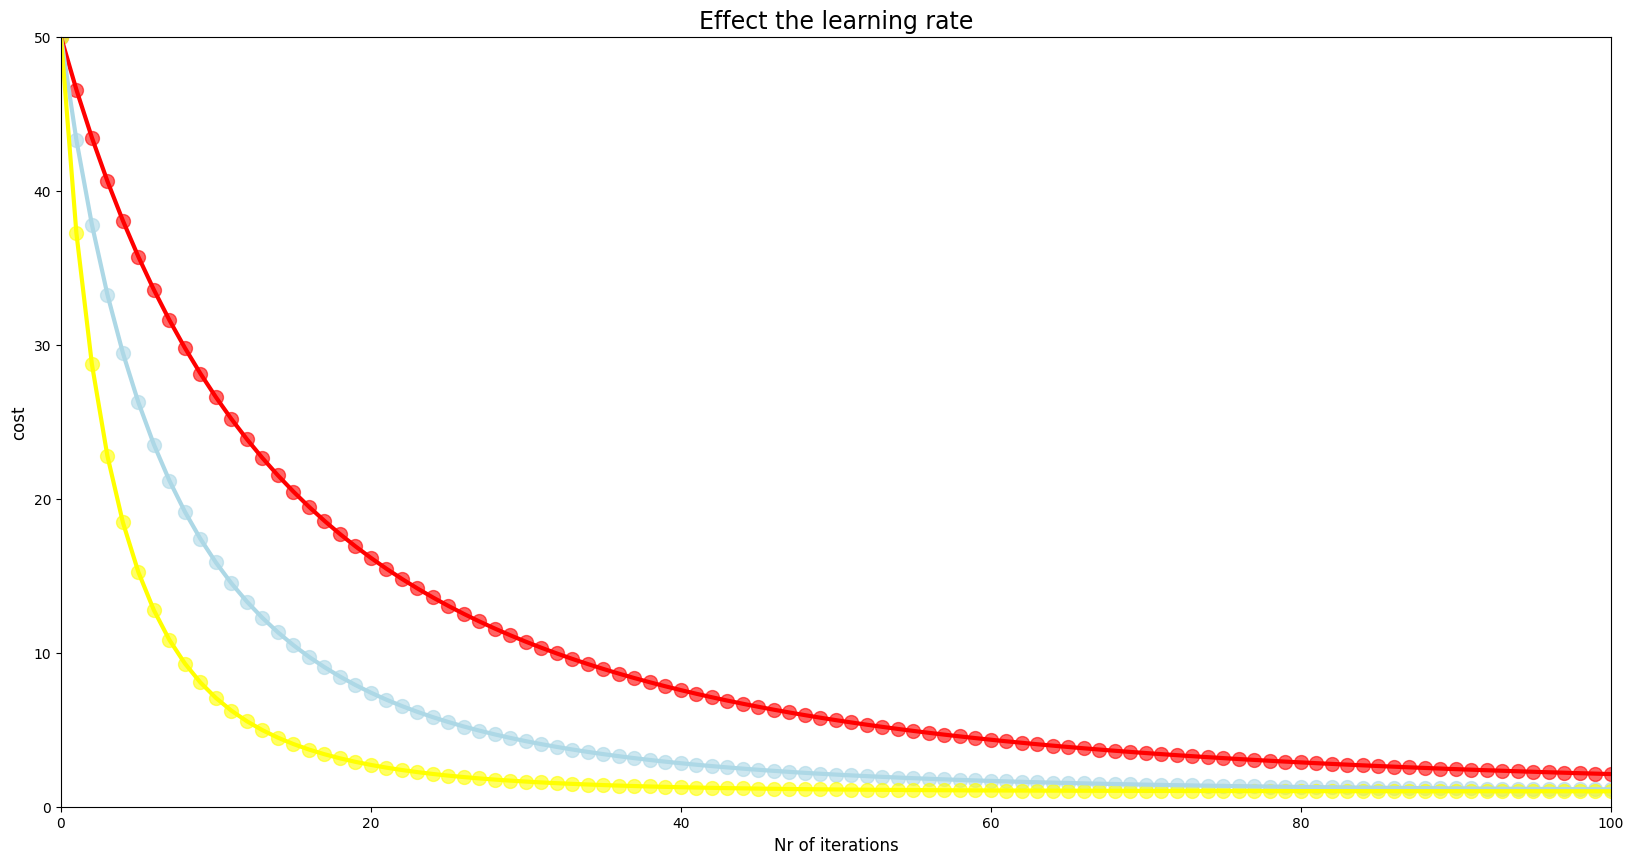

In [69]:
low_gamma = gradient_descent(dg, 3, 0.0005, 0.0001, 100)

mid_gamma = gradient_descent(dg, 3, 0.001, 0.0001, 100)

high_gamma = gradient_descent(dg, 3, 0.002, 0.0001, 100)

plt.figure(figsize=(20, 10))

plt.ylim(0, 50)
plt.xlim(0, 100)

plt.xlabel('Nr of iterations', fontsize=12)
plt.ylabel('cost', fontsize=12)
plt.title('Effect the learning rate', fontsize=17)

low_values = np.array(low_gamma[1])

mid_values = np.array(mid_gamma[1])

high_values = np.array(high_gamma[1])

iterations_list = list(range(0, 101))

plt.plot(iterations_list, g(low_values), linewidth=3, color='red')
plt.scatter(iterations_list, g(np.array(low_values)), color='red', s=100, alpha=0.6)

plt.plot(iterations_list, g(mid_values), linewidth=3, color='lightblue')
plt.scatter(iterations_list, g(np.array(mid_values)), color='lightblue', s=100, alpha=0.6)

plt.plot(iterations_list, g(high_values), linewidth=3, color='yellow')
plt.scatter(iterations_list, g(np.array(high_values)), color='yellow', s=100, alpha=0.6)


plt.show()

# 3D Charts

## $$ f(x, y) = \frac{1}{3^{-x^2 - y^2}+1}$$

### Minimise $$ f(x, y) = \frac{1}{r + 1} $$
### Where $r$ is $3^{-x^2 - y^2}$

In [71]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [80]:
x_4 = np.linspace(-2, 2, 200)
y_4 = np.linspace(-2, 2, 200)


x_4, y_4 = np.meshgrid(x_4, y_4)

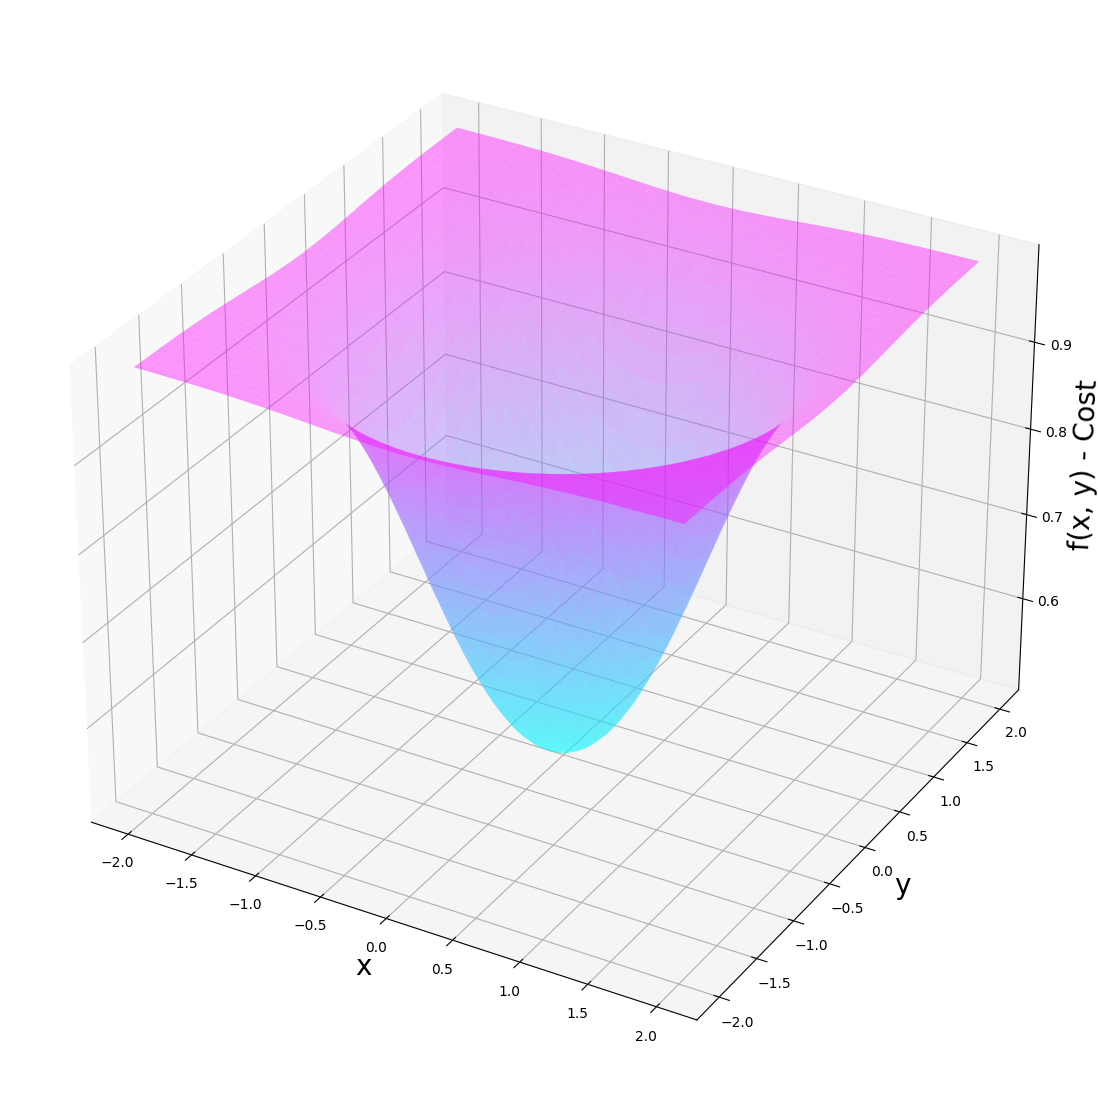

In [90]:
fig = plt.figure(figsize=[16, 14])
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

ax.set_xlabel('x', fontsize=20)

ax.set_ylabel('y', fontsize=20)

ax.set_zlabel('f(x, y) - Cost', fontsize=20)

plt.show()

# Partial Derivatives and symbolic computation

## $$ \frac{\partial f}{\partial x} = \frac{2x \ln(3) * 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1 \right)^2} $$
## $$ \frac{\partial f}{\partial y} = \frac{2y \ln(3) * 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2}+1 \right)^2} $$

In [100]:
a, b = symbols('x, y')
print(f"Our cost function f(x, y) is: {f(a, b)}")
print(f'Partial derivative wrt is: {diff(f(a,b), a)}')
print(f"Value of f(x, y) at x=1.8 y=1.0 is {f(a, b).evalf(subs={a:1.8, b:1.0})}" )
print(f'Value of partial derivative wrt x: {diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})}')

Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is 0.990604794032582
Value of partial derivative wrt x: 0.0368089716197505


## Batch gradient descent with SymPy

In [110]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for char in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

print(f'Values is gradients array: {gradients}')
print(f'Minimum occurs at x values of: {params[0]}')
print(f'Minimum occurs at y values of: {params[1]}')
print(f'Cost is: {f(params[0], params[1])}')



Values is gradients array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x values of: 3.45838599885832E-11
Minimum occurs at y values of: 1.92132555492129E-11
Cost is: 0.500000000000000


In [108]:
def fpx(x, y):
    r = 3**(-x**2-y**2)
    return 2*x*mat.log(3)*r/(r + 1)**2

In [109]:
def fpy(x, y):
    r = 3**(-x**2-y**2)
    return 2*y*mat.log(3)*r/(r + 1)**2

In [112]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for char in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

print(f'Values is gradients array: {gradients}')
print(f'Minimum occurs at x values of: {params[0]}')
print(f'Minimum occurs at y values of: {params[1]}')
print(f'Cost is: {f(params[0], params[1])}')




Values is gradients array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x values of: 3.458385998858304e-11
Minimum occurs at y values of: 1.9213255549212797e-11
Cost is: 0.5
